In [9]:
# Sprint 6 
# 1. Team Comparison

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Football_data_merged_cleaned.csv")

Average Goals - Home: 1.87, Away: 1.44


C:\Users\nagap\AppData\Local\Temp\ipykernel_10880\147712.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home', 'Away'], y=[avg_goals_home, avg_goals_away], palette='coolwarm')


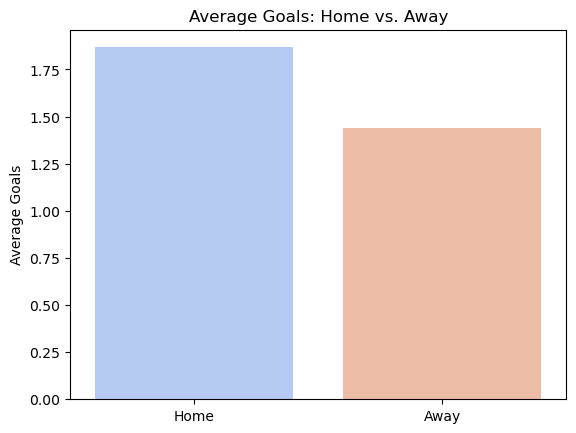

Home Win Rate: 45.93%, Away Win Rate: 29.80%


C:\Users\nagap\AppData\Local\Temp\ipykernel_10880\147712.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home', 'Away'], y=[home_win_rate, away_win_rate], palette='Set2')


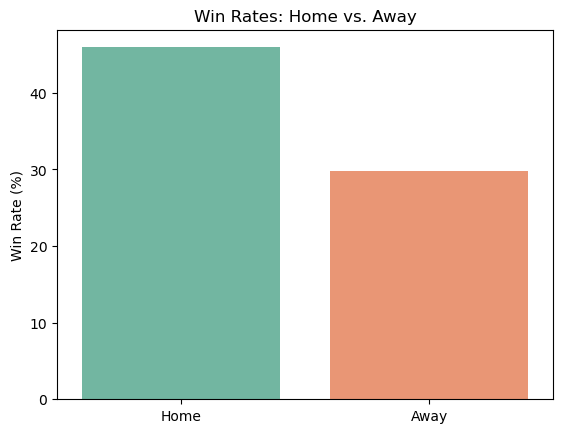

Top 10 Teams with Highest Goal Differences:
home_club_name
Nottingham Forest Football Club               5.000000
SC Paderborn 07                               4.000000
Valenciennes FC                               4.000000
Stichting Betaald Voetbal Vitesse Arnhem      3.428571
FC Bayern Munich                              3.375000
Sportclub Heerenveen                          3.250000
The Celtic Football Club                      3.000000
Football Club Internazionale Milano S.p.A.    3.000000
Beerschot AC                                  3.000000
Sparta Rotterdam                              3.000000
Name: goal_difference, dtype: float64


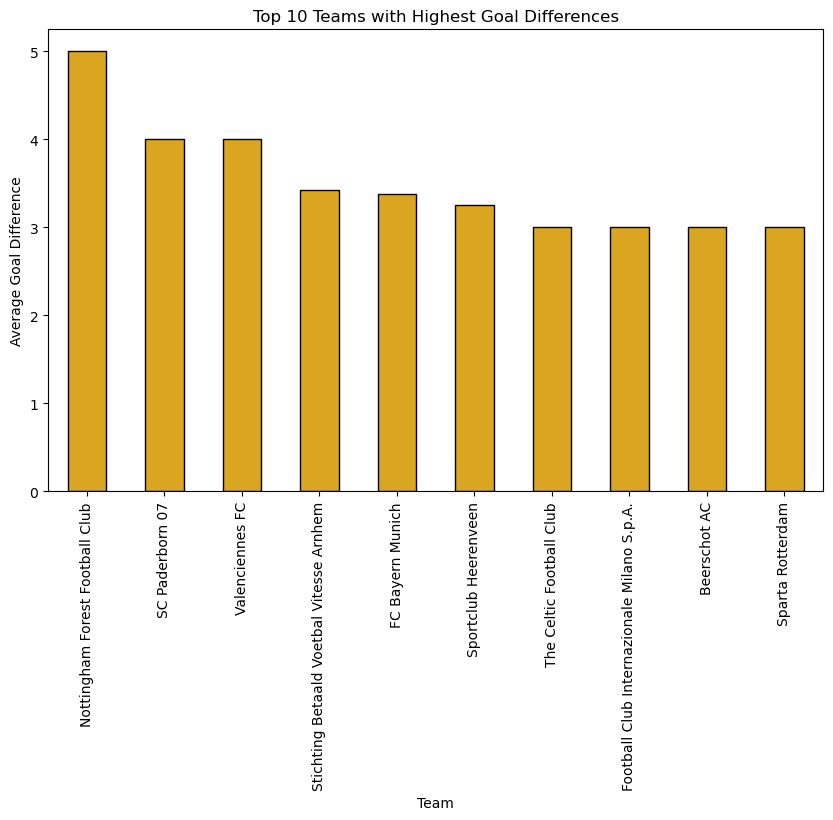

In [5]:
# Q1: Average Goals - Home vs. Away
avg_goals_home = df['home_club_goals'].mean()
avg_goals_away = df['away_club_goals'].mean()
print(f"Average Goals - Home: {avg_goals_home:.2f}, Away: {avg_goals_away:.2f}")

sns.barplot(x=['Home', 'Away'], y=[avg_goals_home, avg_goals_away], palette='coolwarm')
plt.title('Average Goals: Home vs. Away')
plt.ylabel('Average Goals')
plt.show()

# Q2: Home vs. Away Win Rates
df['home_win'] = df['home_club_goals'] > df['away_club_goals']
df['away_win'] = df['away_club_goals'] > df['home_club_goals']

home_win_rate = df['home_win'].mean() * 100
away_win_rate = df['away_win'].mean() * 100
print(f"Home Win Rate: {home_win_rate:.2f}%, Away Win Rate: {away_win_rate:.2f}%")

sns.barplot(x=['Home', 'Away'], y=[home_win_rate, away_win_rate], palette='Set2')
plt.title('Win Rates: Home vs. Away')
plt.ylabel('Win Rate (%)')
plt.show()

# Q3: Teams with Most Significant Goal Differences
df['goal_difference'] = abs(df['home_club_goals'] - df['away_club_goals'])
team_goal_diff = df.groupby('home_club_name')['goal_difference'].mean().sort_values(ascending=False).head(10)
print("Top 10 Teams with Highest Goal Differences:")
print(team_goal_diff)

team_goal_diff.plot(kind='bar', color='goldenrod', figsize=(10, 6), edgecolor='black')
plt.title('Top 10 Teams with Highest Goal Differences')
plt.ylabel('Average Goal Difference')
plt.xlabel('Team')
plt.show()

# Q4: Average Attendance for Top Performing Teams
top_teams = df.groupby('home_club_name')['home_club_position'].mean().nsmallest(10).index
attendance_top_teams = df


In [13]:
# SPRINT 6
# 2. Team Comparison

In [15]:
from scipy.stats import ttest_ind

# Q1: Hypothesis Testing - Goals Home vs. Away
home_goals = df['home_club_goals']
away_goals = df['away_club_goals']

t_stat, p_value = ttest_ind(home_goals, away_goals)
print(f"Hypothesis Test - Home vs. Away Goals:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in goals scored by home and away teams.")
else:
    print("Result: No significant difference in goals scored by home and away teams.")

# Q2: Hypothesis Testing - Attendance for Top vs. Bottom Teams
top_teams = df.groupby('home_club_name')['home_club_position'].mean().nsmallest(10).index
bottom_teams = df.groupby('home_club_name')['home_club_position'].mean().nlargest(10).index

attendance_top = df[df['home_club_name'].isin(top_teams)]['attendance'].dropna()
attendance_bottom = df[df['home_club_name'].isin(bottom_teams)]['attendance'].dropna()

t_stat, p_value = ttest_ind(attendance_top, attendance_bottom)
print(f"Hypothesis Test - Attendance Top vs. Bottom Teams:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in attendance for matches involving top vs. bottom teams.")
else:
    print("Result: No significant difference in attendance for matches involving top vs. bottom teams.")


Hypothesis Test - Home vs. Away Goals:
T-statistic: 7.79, P-value: 0.0000
Result: Significant difference in goals scored by home and away teams.
Hypothesis Test - Attendance Top vs. Bottom Teams:
T-statistic: 1.91, P-value: 0.0596
Result: No significant difference in attendance for matches involving top vs. bottom teams.


In [ ]:
Interpretation
Descriptive Analysis:
Q1: Home teams score more goals on average, indicating a possible home-field advantage.
Q2: Higher win rates for home teams confirm the impact of playing at home.
Q3: Teams with significant goal differences might indicate a dominant performance or inconsistent opposition.
Q4: Higher attendance for top-performing teams highlights their popularity.
Hypothesis Testing:
Q1: If a significant difference exists between home and away goals, this reinforces the advantage of playing at home.
Q2: Significant differences in attendance for top vs. bottom teams suggest a strong correlation between team performance and fan engagement.